# Learning Notebook - SLU8 - Data Problems

This notebook is associated with this [presentation](https://docs.google.com/presentation/d/1bu6ORtlvKfPI7ZwEA-BOSxpg1pHGvsemFHo0MhoR6ss/edit?usp=sharing). The **main objective** is to let you go through the most common problems in a typical dataset.

What we cover here:
- Common data entry problems
- Missing data
- Duplicated data
- Outlier detection
- Dealing with outliers
- Nunique
- Drop duplicates
- Data imputation techniques


-----
_By: [Hugo Lopes](https://www.linkedin.com/in/hugodlopes/)  
LDSA - SLU8_

In [1]:
import pandas as pd 
import numpy as np 

% matplotlib inline
from matplotlib import pyplot as plt

# Load Data
Let's use some _toy data_:

In [2]:
data = pd.read_csv('data_with_problems.csv', index_col=0)
data.head(10)

,age,height,gender
CFLOXRHMDR,88.0,163.0,female
FXLJSNLSOG,29.0,158.0,female
FWDIVJKGOI,42.0,159.0,female
YWEBKQWHRE,25.0,179.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
SSZQEGTLNK,NaN,162.0,male
PRFEFXNGWN,36.0,166.0,female


Looks like we have 2 numerical variables (`age` and `height`) and 1 categorical variable (`gender`).

# Data Entry Problems
Typical data entry problems can be of:
- Case sensitivity
- Grammar errors (_typos_)
- Wrong Data Types
- Missing data types (or “I really don’t know what to put here but I’m obliged to write something”)
- and a lot more not covered here!

Let's take a look at our categorical feature `gender`. The best and fastest way to take a look is to use `value_counts()` (count per each unqiue value) and/or `nunique()` (number of unique values).

In [3]:
data.gender.nunique()

3

In [4]:
data.gender.value_counts()

female    113
male       69
MALE        9
Name: gender, dtype: int64

This is a typical problem of case sensitivity: `MALE` and `male` are the same. Let's solve it by transforming all data to lower case

In [5]:
data.gender = data.gender.str.lower()

And now confirm it is good to go...

In [6]:
data.gender.value_counts()

female    113
male       78
Name: gender, dtype: int64

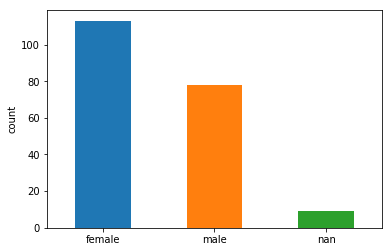

In [7]:
data.gender.value_counts(dropna=False).plot(kind='bar', rot=0)
plt.ylabel('count')
plt.show()

Nice! An alternative could have been to use `data.gender.replace({'MALE': 'male'})`.

# Duplicated Data
First question yourself if the duplicate is really a duplicate! Define duplicates in the context of your problem. Nevertheless, we seem to have a problem with some duplicated data (take a look at the above `head()` on the data). 

We can find duplicates using Pandas [`duplicated()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html) and drop duplicated data with [`drop_duplicates()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html).

In [8]:
duplicated_mask = data.duplicated()

print('Number of duplicates:', duplicated_mask.sum())

Number of duplicates: 6


So we have 6 entries which are duplicated! How do they look like?

In [9]:
data[duplicated_mask]

,age,height,gender
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
XUAJJPLVOI,18.0,168.0,female
TRMMGYEEPC,21.0,156.0,female
ZNLRYQHPXJ,25.0,155.0,male


So, these are the duplicated observations. This means that for each unique observation above we have another one in our dataset, at least. Notice the `keep='first'` in `data.duplicated(...)` means that the returned mask only includes the duplicates, not including the first observation it showed up (for example, there are a total of 4 rows with index `YPUQAPSOYJ`). 

How can we drop duplicates except for the first occurrence?

In [10]:
print('Shape before dropping duplicates:', data.shape)
data = data.drop_duplicates()
print('Shape after dropping duplicates:', data.shape)

Shape before dropping duplicates: (200, 3)
Shape after dropping duplicates: (194, 3)


Makes sense, since we deleted 6 duplicates.

# Missing Data
This is probably the biggest data problem we generally face. There are several ways to deal with missing values, e.g.:
- Drop rows which contain missing values.
- Fill missing values with zero.
- Fill missing values with median of the column the missing values are located.
- (More advanced) use decision trees to predict the missing values.
- Understand the real nature of the missing value and act individually.

So, how many missing values do we have?

In [11]:
data.isnull().sum()

age       9
height    4
gender    9
dtype: int64

We have missing values in all columns. What are the rows with at least one missing value?

In [12]:
data[data.isnull().sum(axis=1).astype(bool)]

,age,height,gender
SSZQEGTLNK,NaN,162.0,male
CWCFROPRFE,22.0,NaN,male
TJQPFEFVVH,NaN,182.0,NaN
PYHWLDVICX,NaN,181.0,female
MLRPKGKACD,NaN,185.0,male
SGMGUJEBNC,NaN,173.0,male
EORSIPDIHA,21.0,NaN,male
YZDOYNOXAF,NaN,144.0,female
QXUGUHCOPT,101.0,196.0,NaN
LKEHZFGGTS,49.0,177.0,NaN


**Numerical Variables**: let's solve the missing values by replacing with the median.

**Categorical Variables**: let's solve the missing values by replacing with a new category called `unknown`.

In [13]:
data = data.fillna({'age': data.age.median(),
                    'height': data.height.median(),
                    'gender': 'unknown'})

It is easy to notice that we could have improved the missing value imputation for instance in `height`. We could have inputted as: `height` of `gender='male'` by median of male height, and the same for females.

You should confirm that you have no more missing values in your data:

In [14]:
data.isnull().sum().sum()

0

Good to go!

# Outliers
Outliers are very common and they might affect the performance of some machine learning algorithms in a negative way (e.g., Logistic Regression); others, can handle them pretty well (tree-based).

Most common techniques:
- **Delete observations**: define bounds for feature (hard-limits, std, percentiles, interquartile ranges)
- **Transform data**: apply log, square or cube root, saturation (limit it to a maximum/minimum value)
- **Bin values**: categorize variable
- **Impute values** (as for missing values - careful with this since it is business related).

Let's take a look at some of these techniques, but starting with the diagnosis - visualization helps a lot on finding outliers (scatter plots, histograms and box-plots are the best)!

How does the distribution of `height` look like?

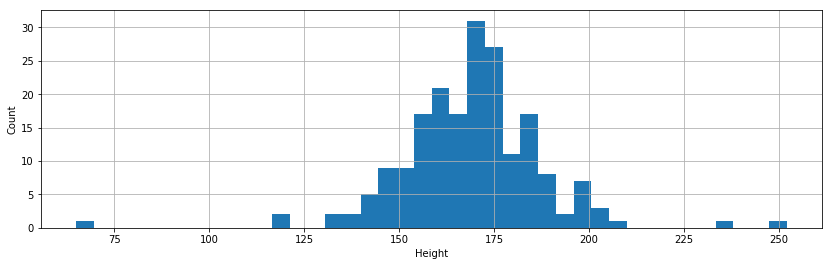

In [15]:
data.height.hist(bins=40, figsize=(14,4))
plt.xlabel('Height') 
plt.ylabel('Count')
plt.show()

This was useful, we can see that there are some really tall people, and some quite small ones. The plot resembles a Normal distribution. 

### Who is outside of 1, 2 and 3 standard deviations? 
Let's create a quick report on the that...

In [16]:
def print_analysis(series):
    for nr in range(1, 4):
        
        upper_limit = series.mean() + (nr * series.std())
        lower_limit = series.mean() - (nr * series.std())
                
        over_range = series > upper_limit
        percent_over_range = over_range.sum() / len(series) * 100
        
        under_range = series < lower_limit 
        percent_under_range = under_range.sum() / len(series) * 100
        
        in_range = (series < upper_limit) & (series > lower_limit)
        percent_in_range = in_range.sum() / len(series) * 100


        print('\nFor the range of %0.0f standard deviations:' % nr)
        print('  Lower limit:               %0.0f' % lower_limit)
        print('  Percent under range:       %0.1f%%' % percent_under_range)
        print('  Upper limit:               %0.0f' % upper_limit)
        print('  Percent over range:        %0.1f%%' % percent_over_range)
        print('  Percent within range:      %0.1f%%' % percent_in_range)

In [17]:
print_analysis(data.height)


For the range of 1 standard deviations:
  Lower limit:               150
  Percent under range:       11.3%
  Upper limit:               187
  Percent over range:        11.9%
  Percent within range:      76.8%

For the range of 2 standard deviations:
  Lower limit:               131
  Percent under range:       2.1%
  Upper limit:               206
  Percent over range:        1.5%
  Percent within range:      96.4%

For the range of 3 standard deviations:
  Lower limit:               113
  Percent under range:       0.5%
  Upper limit:               225
  Percent over range:        1.0%
  Percent within range:      98.5%


Looks like that if we use the boundary of 2 standard deviations, we keep some values that make complete sense. Then, time to create a _mask_ with the outliers (out of these 2 standard deviation bounds).

In [18]:
# Calculate the mean and standard deviation
std_height = data['height'].std()
mean_height = data['height'].mean()
# The mask!
mask_height_outliers = (data['height'] < mean_height-2*std_height) | \
                       (data['height'] > mean_height+2*std_height)
print('Height bounds:')
print('> Minimum accepted height: %3.1f' % (mean_height-2*std_height))
print('> Maximum accepted height: %3.1f' % (mean_height+2*std_height))
print('> Number of outliers (out of bounds):', mask_height_outliers.sum())

Height bounds:
> Minimum accepted height: 131.5
> Maximum accepted height: 206.2
> Number of outliers (out of bounds): 7


Which ones are **out of the bounds**?

In [19]:
data[mask_height_outliers]

,age,height,gender
ZUMSOSOZUX,21.0,252.0,female
QMAARXTCCQ,26.0,65.0,female
XTGTMAUIMJ,49.0,235.0,female
VYIYVAVHOY,25.0,119.0,female
JFVZOEGUUA,27.0,208.0,female
RPXMEBIHPC,32.0,119.0,male
WTWLZNEVPA,26.0,131.0,female


We could eliminate these rows by doing `data = data.loc[~mask_height_outliers]`, but let us do something different.

### Binning
Let's bin the variable `height` and transform it into a categorical variable instead of eliminating the 7 _outliers_ rows we saw above. We might lose some granularity by binning variables, but we also minimize the consequences of the outliers. 

We can use the pandas function [`qcut`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html) to bin numerical variables. It is a quantile-based discretization function and discretizes the variable into equal-sized buckets based on rank or based on sample quantiles.

In [20]:
height_bins = pd.qcut(data['height'], 
                      5, 
                      labels=['very short', 'short', 'average', 'tall', 'very tall'])
height_bins.head()

CFLOXRHMDR      short
FXLJSNLSOG      short
FWDIVJKGOI      short
YWEBKQWHRE       tall
YPUQAPSOYJ    average
Name: height, dtype: category
Categories (5, object): [very short < short < average < tall < very tall]

And now, replace the original `height` by the new binned one.

In [21]:
data.height = height_bins
data.head(10)

,age,height,gender
CFLOXRHMDR,88.0,short,female
FXLJSNLSOG,29.0,short,female
FWDIVJKGOI,42.0,short,female
YWEBKQWHRE,25.0,tall,male
YPUQAPSOYJ,32.0,average,male
SSZQEGTLNK,27.0,short,male
PRFEFXNGWN,36.0,short,female
IIVXDNOAIV,1.0,short,female
VVQYVNRAGQ,18.0,very short,female
YVEDWPTEEB,31.0,very short,female


#### Age
We actually know the limits of age (at least for now). Values below 0 or above 120 should be suspicious and we can consider them outliers. How does our `age` look like?

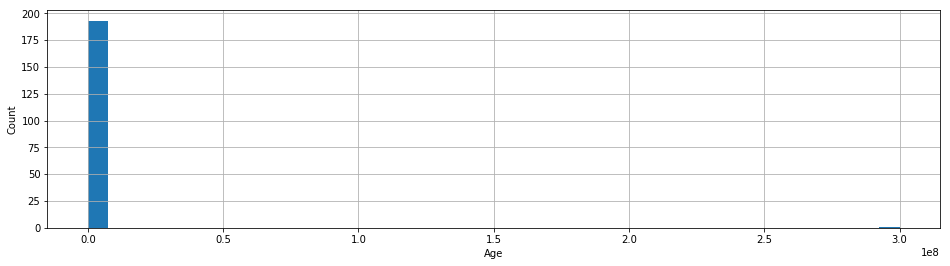

In [22]:
data.age.hist(bins=40, figsize=(16,4))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Something really bad happened here. Let's apply our common sense knowledge.

In [23]:
mask_age_outliers = (data.age < 0) | (data.age > 120)
print('Number of detected outliers:', mask_age_outliers.sum())

Number of detected outliers: 2


In [24]:
data.age[mask_age_outliers]

TSHRBGFOJU    300000000.0
SQYVEHAWSW          224.0
Name: age, dtype: float64

Yes, doesn't make much sense. We can drop these:

In [25]:
data = data[~mask_age_outliers]

# Final Dataset after Data Problems handling

In [26]:
print('Our dataset has %d columns (features) and %d rows (people).' % (data.shape[1], 
                                                                       data.shape[0]))

Our dataset has 3 columns (features) and 192 rows (people).
